In [48]:
import os
import random


from dotenv import load_dotenv
import spacy
from spacy.symbols import NOUN, VERB, PROPN
import requests

from IPython.display import Image

load_dotenv(".env")

True

In [2]:
nlp = spacy.load("en_core_web_sm");

In [3]:
slide = "She has written, lectured, and lectured to various universities and departments in the US "
"and around the world as well as for the American Association for the Advancement of Science."

'and around the world as well as for the American Association for the Advancement of Science.'

In [4]:
doc = nlp(slide)

In [7]:
keywords = set([
    token.lemma_.lower() for token in doc 
    if (any(token.pos == pos for pos in (PROPN, NOUN, VERB))
    and not token.is_stop)
])
keywords

{'department', 'lecture', 'university', 'write'}

In [8]:
random.sample(tuple(keywords), 3)

['lecture', 'write', 'department']

In [9]:
def get_keywords(text: str):
    doc = nlp(text)
    keywords = set([
        token.lemma_.lower() for token in doc 
        if (any(token.pos == pos for pos in (PROPN, NOUN, VERB))
        and not token.is_stop)
    ])
    return random.sample(tuple(keywords), 3)

In [15]:
get_keywords(slide)

['lecture', 'department', 'write']

In [16]:
unsplash_key = os.getenv("unsplash_key")

In [29]:
base_url = "https://api.unsplash.com/photos/random?query={q}&client_id={key}"

In [30]:
url = base_url.format(q=",".join(keywords), key=unsplash_key)

In [31]:
res = requests.get(url)
res

<Response [200]>

In [32]:
res.json()

{'id': 'W9hjnF3M4QM',
 'created_at': '2020-01-03T16:46:28Z',
 'updated_at': '2022-10-10T06:11:06Z',
 'promoted_at': None,
 'width': 3763,
 'height': 3763,
 'color': '#c0d9f3',
 'blur_hash': 'LpIi8~RPIAj?.ARjRjayn#ofozfR',
 'description': 'Northeastern University/building in winter',
 'alt_description': None,
 'urls': {'raw': 'https://images.unsplash.com/photo-1578069862702-3f345d2cdf11?ixid=MnwzNjgwMzd8MHwxfHJhbmRvbXx8fHx8fHx8fDE2NjU0MzIyOTM&ixlib=rb-1.2.1',
  'full': 'https://images.unsplash.com/photo-1578069862702-3f345d2cdf11?crop=entropy&cs=tinysrgb&fm=jpg&ixid=MnwzNjgwMzd8MHwxfHJhbmRvbXx8fHx8fHx8fDE2NjU0MzIyOTM&ixlib=rb-1.2.1&q=80',
  'regular': 'https://images.unsplash.com/photo-1578069862702-3f345d2cdf11?crop=entropy&cs=tinysrgb&fit=max&fm=jpg&ixid=MnwzNjgwMzd8MHwxfHJhbmRvbXx8fHx8fHx8fDE2NjU0MzIyOTM&ixlib=rb-1.2.1&q=80&w=1080',
  'small': 'https://images.unsplash.com/photo-1578069862702-3f345d2cdf11?crop=entropy&cs=tinysrgb&fit=max&fm=jpg&ixid=MnwzNjgwMzd8MHwxfHJhbmRvbXx8fHx8fHx

In [37]:
download_link = res.json()['links']['download']
download_link

'https://unsplash.com/photos/W9hjnF3M4QM/download?ixid=MnwzNjgwMzd8MHwxfHJhbmRvbXx8fHx8fHx8fDE2NjU0MzIyOTM'

In [38]:
res_dl = requests.get(download_link)

In [39]:
res_dl

<Response [200]>

In [46]:
fname = f"images/{'_'.join(keywords)}.jpg"
with open(fname, 'wb') as f:
    f.write(res_dl.content)

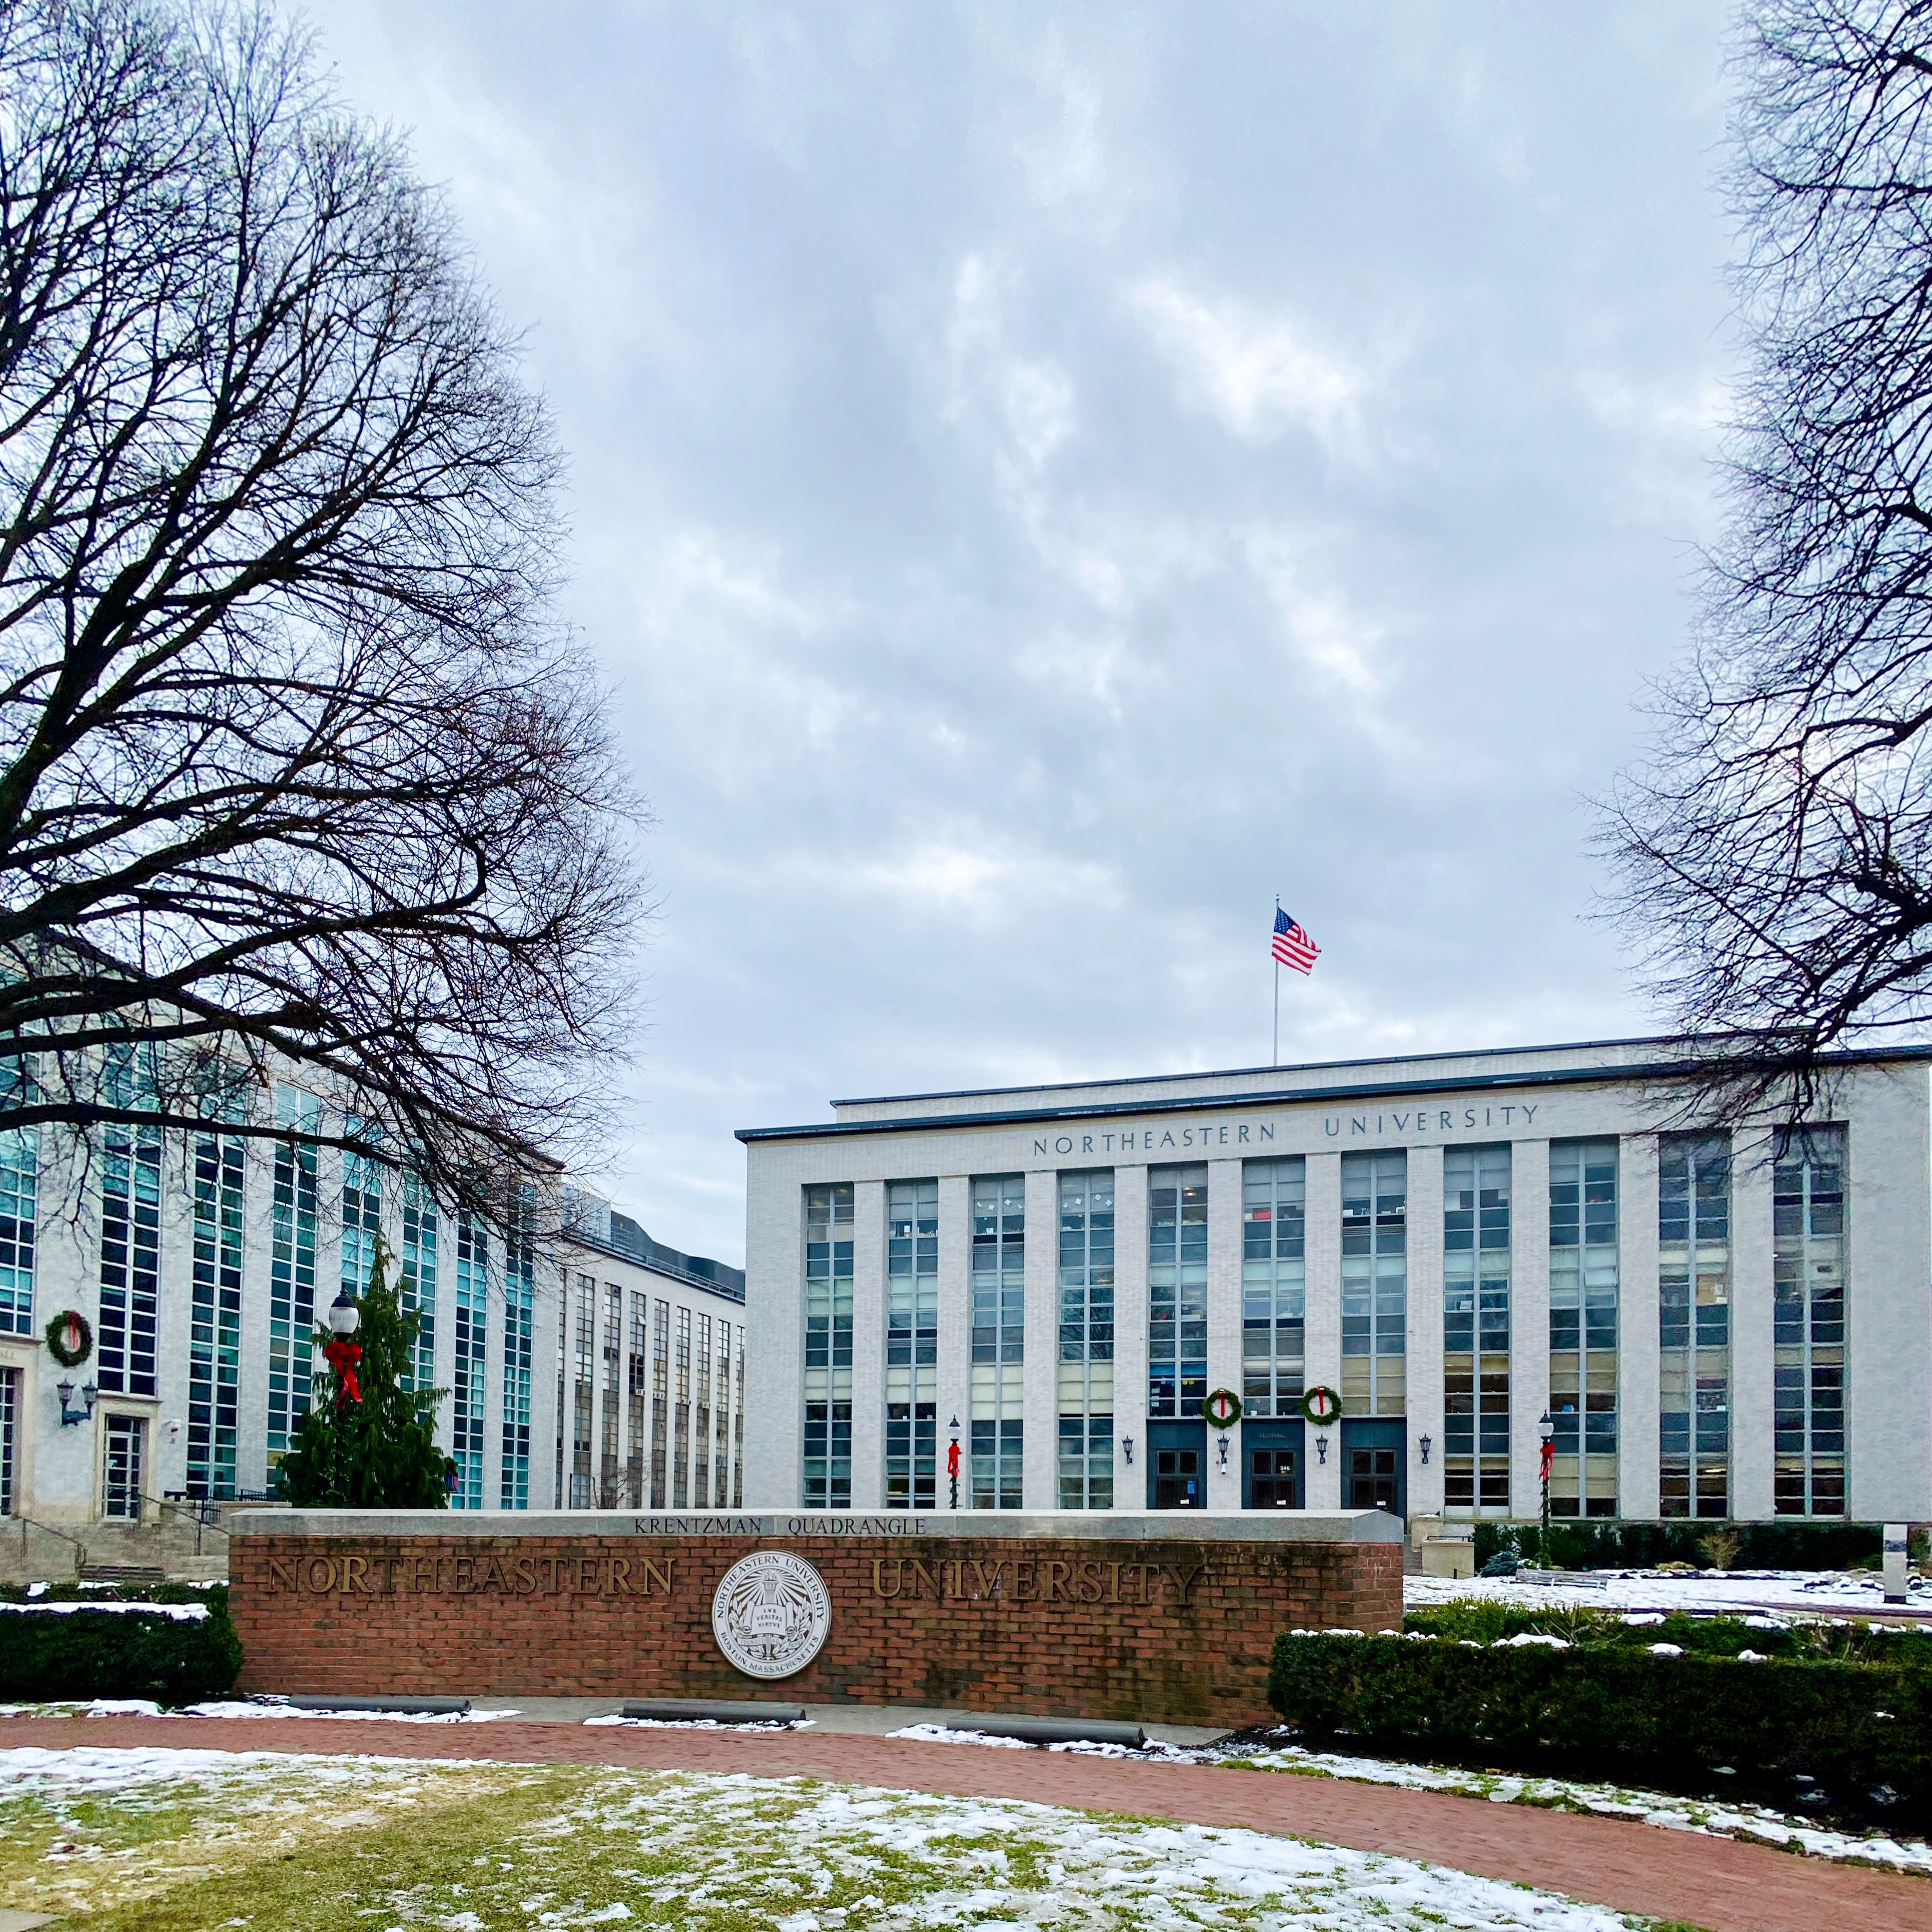

In [49]:
Image(filename=fname) 